In [1]:
cd /home/tungnguyendinh/interns/users/hoa_hoangthi/KLTN

/home/tungnguyendinh/interns/users/hoa_hoangthi/KLTN


In [2]:
pwd

'/home/tungnguyendinh/interns/users/hoa_hoangthi/KLTN'

In [3]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-fb8c_44h
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-fb8c_44h
  Resolved https://github.com/albumentations-team/albumentations to commit 89a675cbfb2b76f6be90e7049cd5211cb08169a5
  Preparing metadata (setup.py) ... done


In [4]:
!pip install helper

In [5]:
# download dataset

!git clone https://github.com/parth1620/Human-Segmentation-Dataset-master.git

fatal: destination path 'Human-Segmentation-Dataset-master' already exists and is not an empty directory.


In [6]:
import sys
sys.path.append('hoa_hoangthi/KLTN/Human-Segmentation-Dataset-master')

In [7]:
import torch 
import cv2

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import helper

In [8]:
pwd

'/home/tungnguyendinh/interns/users/hoa_hoangthi/KLTN'

In [9]:
CSV_FILE = './Human-Segmentation-Dataset-master/train.csv'
DATA_DIR = './'
DEVICE = 'cuda'
EPOCHS = 25
LR = 0.003
IMG_SIZE = 320
BATCH_SIZE = 16

ENCODER = 'timm-efficientnet-b0'
WEIGHTS = 'imagenet'

In [10]:
df = pd.read_csv(CSV_FILE)
df.head()

,masks,images
0,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
1,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
2,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
3,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
4,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...


In [11]:
row = df.iloc[0]

image_path = row.images
mask_path = row.masks

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) / 255.0

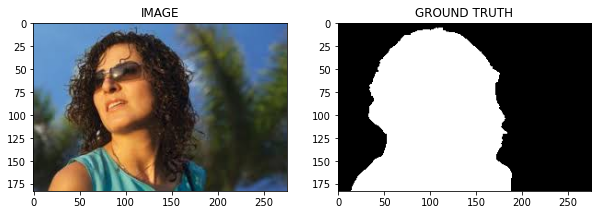

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('GROUND TRUTH')
ax2.imshow(mask,cmap = 'gray')

In [13]:
train_df, valid_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [14]:
# Augmentation functions

import albumentations as A

In [15]:
def get_train_augs():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.HorizontalFlip(p = 0.5),
        A.VerticalFlip(p = 0.5)
    ])

def get_valid_augs():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
    ])

In [16]:
# Create custom dataset

from torch.utils.data import Dataset

In [17]:
class SegmentationDataset(Dataset):
    def __init__(self, df, augmentations):
        self.df = df
        self.augmentations = augmentations
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = row.images
        mask_path = row.masks
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) #(h, w, c)
        mask = np.expand_dims(mask, axis = -1)
        
        if self.augmentations:
            data = self.augmentations(image = image, mask = mask)
            image = data['image']
            mask = data['mask']
            
        #(h, w, c) -> (c, h, w)
        
        image= np.transpose(image, (2,0,1)).astype(np.float32)
        mask = np.transpose(mask, (2,0,1)).astype(np.float32)
                            
        image = torch.Tensor(image) / 255.0
        mask = torch.round(torch.Tensor(mask) / 255.0)
        return image, mask

In [18]:
trainset = SegmentationDataset(train_df, get_train_augs())
validset = SegmentationDataset(valid_df, get_valid_augs())

In [19]:
print(f"Size of Trainet : {len(trainset)}")
print(f"Size of Validset : {len(validset)}")

Size of Trainet : 232
Size of Validset : 58


In [24]:
idx = 3

image, mask = trainset[idx]
helper.show_image(image, mask)

AttributeError: module 'helper' has no attribute 'show_image'

In [23]:
import importlib
importlib.reload(helper)

<module 'helper' from '/home/tungnguyendinh/interns/users/hoa_hoangthi/KLTN/helper.py'>

In [21]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2022-03-16 10:27:14--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-03-16 10:27:14 (26.5 MB/s) - ‘helper.py’ saved [2813/2813]

